https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts/code

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier() 

from sklearn.tree import DecisionTreeClassifier

d = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier

k = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB

g = GaussianNB()

b = BernoulliNB()

from xgboost import XGBClassifier

xgbc = XGBClassifier()

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

In [36]:
df = pd.read_csv("India_Menu.csv")

In [37]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [39]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [40]:
df["Sodium (mg)"].value_counts()

0.32      2
706.13    1
185.73    1
40.78     1
51.31     1
         ..
804.04    1
742.60    1
773.60    1
622.95    1
10.80     1
Name: Sodium (mg), Length: 139, dtype: int64

In [41]:
df["Sodium (mg)"] = df["Sodium (mg)"].fillna(df["Sodium (mg)"].mean())

In [52]:
df["species"] = np.nan
for i in range(len(df)):
    if 'ml' in str(df['Per Serve Size'][i]):
        df['species'][i] = 'drink'
    else:
        df['species'][i] = 'food'

In [53]:
df["species"].value_counts()

food     73
drink    68
Name: species, dtype: int64

In [54]:
df["Per Serve Size"] = df["Per Serve Size"].str.replace(" g" ,"")

In [55]:
df["Per Serve Size"] = df["Per Serve Size"].str.replace(" ml" ,"")

st

In [56]:
df["Per Serve Size"] = df["Per Serve Size"].astype("float")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    float64
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
 13  species                 141 non-null    object 
dtypes: float64(11), object(3)
memory usage: 15

In [58]:
df["Menu Category"].value_counts()

McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Regular Menu'),
  Text(1, 0, 'Breakfast Menu'),
  Text(2, 0, 'McCafe Menu'),
  Text(3, 0, 'Desserts Menu'),
  Text(4, 0, 'Gourmet Menu'),
  Text(5, 0, 'Beverages Menu'),
  Text(6, 0, 'Condiments Menu')])

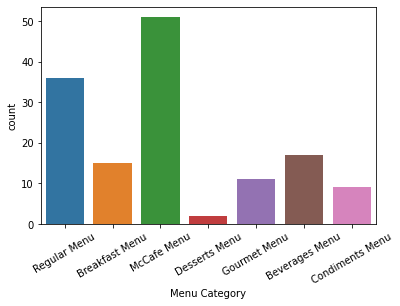

In [59]:
sns.countplot(df["Menu Category"])
plt.xticks(rotation = 30)

In [60]:
df["Menu Items"].value_counts()

McVeggie™ Burger                 1
Medium Soft Serve: Strawberry    1
American Mud Pie Shake           1
Soft serve cone                  1
McSwirl ChocoDip                 1
                                ..
Egg McMuffin                     1
Sausage Mc Muffin with egg       1
Sausage Mc Muffin                1
Spicy Egg McMuffin               1
Mixed Fruit Beverage             1
Name: Menu Items, Length: 141, dtype: int64

# Modelling

In [88]:
y = df["Menu Category"]

x = df.drop(["Menu Category" , "Menu Items"], axis=1)

In [89]:
x = pd.get_dummies(x)

In [90]:
df_model = pd.concat([x,y] , axis=1)

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [92]:
import numpy as np

In [95]:
from pycaret.classification import *

exp_name = setup(data = df_model , target = "Menu Category")

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8078,0.0931,0.6875,0.7806,0.7783,0.7426,0.7605,0.1640
rf,Random Forest Classifier,0.7889,0.0961,0.6735,0.7501,0.7590,0.7169,0.7321,0.1760
gbc,Gradient Boosting Classifier,0.7500,0.0867,0.6632,0.7490,0.7311,0.6679,0.6839,0.1160
xgboost,Extreme Gradient Boosting,0.7178,0.0000,0.6486,0.6951,0.6909,0.6526,0.6682,0.0250
lightgbm,Light Gradient Boosting Machine,0.7178,0.0906,0.5703,0.6924,0.6872,0.6177,0.6368,0.0180
lda,Linear Discriminant Analysis,0.7167,0.0821,0.6085,0.7123,0.6931,0.6211,0.6428,0.0050
knn,K Neighbors Classifier,0.6967,0.0693,0.5568,0.6435,0.6555,0.5857,0.6053,0.0460
lr,Logistic Regression,0.6867,0.0689,0.5405,0.6300,0.6479,0.5703,0.5968,0.0710
nb,Naive Bayes,0.6333,0.0796,0.5401,0.6118,0.5982,0.5225,0.5502,0.0050
ridge,Ridge Classifier,0.6267,0.0000,0.4949,0.5672,0.5877,0.4781,0.4915,0.0040


## Menüyü en iyi tahmin eden algoritmamız Extra Trees Classifier'dır